In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
from skimage import color
import tempfile
import os
from timeit import default_timer as timer
from tempfile import TemporaryFile
import decimal
from decimal import *
from numpy import loadtxt
import pickle

In [2]:
from scipy import stats

In [3]:
train_109_path ='/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P109C/P109_train.pkl'
val_109_path = '/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P109C/P109_val.pkl'
test_109_path = '/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P109C/P109_test.pkl'

train_22_path ='/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P22/P22_train.pkl'
val_22_path = '/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P22/P22_val.pkl'
test_22_path = '/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P22/P22_test.pkl'

train_17_path = '/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P17/P17_train.pkl'
val_17_path = '/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P17/P17_val.pkl'
test_17_path ='/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P17/P17_test.pkl'

train_19_path = '/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P19/P19_train.pkl'
val_19_path = '/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P19/P19_val.pkl'
test_19_path = '/bph/puredata1/bioinfdata/user/phikie/Big_data_set_creation/Split_dfs/P19/P19_test.pkl'

In [4]:
#For modelling the two presumably different states (aSyn-Fluo (1) and None (0)) the dataframes have to be split, 
#by observing the aSYn-Fluo-state in the dataframe
def DF_divider(DF):
    
    DF_zero = DF[DF.aSyn_fluo == 0]
    DF_one = DF[DF.aSyn_fluo == 1]
    
    return(DF_zero, DF_one)

In [5]:
#Load and divide a DF based on its aSyn-state
def Stat_divide(data):
    
    test = pickle.load(open(data, 'rb'))

    Zero_DF, One_DF = DF_divider(test)
    
    return(Zero_DF, One_DF)

In [6]:
def t_tester(path):
    
    
    Zero, One = Stat_divide(path)
    t_values = []
    
    p_values = []
    
    for i in range((Zero.shape[1]-1)):
                   
        test = stats.ttest_ind(Zero.iloc[:, i:(i+1)], One.iloc[:, i:(i+1)], equal_var=False)
                   
        t_values.append(test[0])
        p_values.append(test[1])
        
        
    
    
    #Plotting the data
    %matplotlib inline

    fig, ax1 = plt.subplots(figsize=(16, 3), sharex=False)

    X = np.arange(Zero.shape[1]-1)


    #ax1.figure(figsize=(6,6))
    #ax2.figure(figsize=(6,6)) 

    ax1.plot(X, (np.linspace(0.1, 0.1, Zero.shape[1]-1)), 'k', lw=3, zorder=9)
    ax1.scatter(X, p_values, c='r', s=50, zorder=10, edgecolors=(0, 0 ,0))

    ax1.set_title('P_values')


    ax1.set(xlabel='Wavenumber (WN)', ylabel='Probability')

    ax1.set_xlim(0, Zero.shape[1]-1)
    ax1.set_ylim(0, 1)
    
    result_array = np.array([t_values, p_values])
                   
    return(result_array)
                   
                   
                   
                   

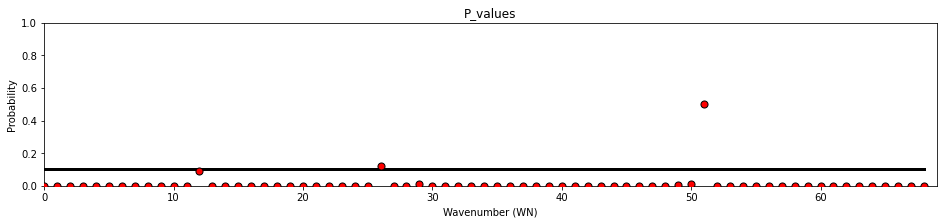

In [7]:
P22_stats = t_tester(val_22_path)

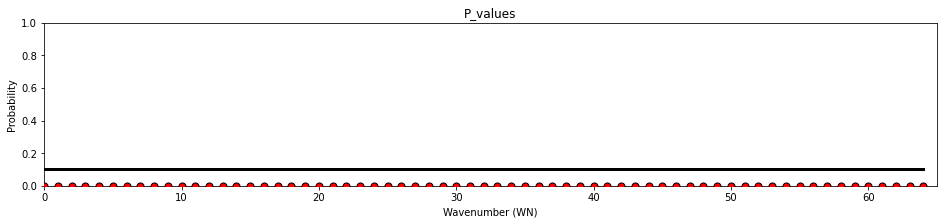

In [8]:
P17_stats = t_tester(val_17_path)

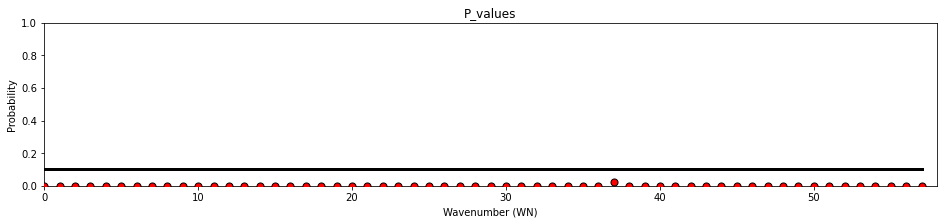

In [9]:
P19_stats = t_tester(val_19_path)

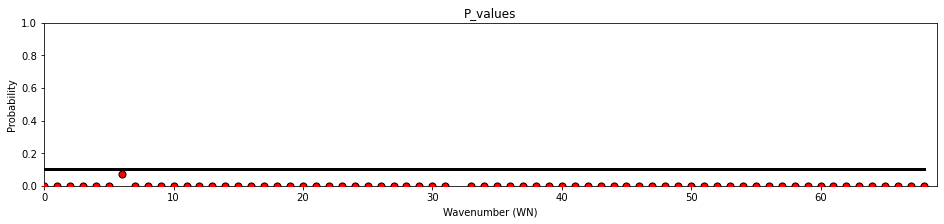

In [10]:
P109_stats = t_tester(val_109_path)

In [11]:
P22_stats.shape

(2, 69, 1)

In [12]:
np.save('/bph/puredata1/bioinfdata/user/phikie/Stats_resultate/P17_stats.npy', P17_stats)
np.save('/bph/puredata1/bioinfdata/user/phikie/Stats_resultate/P19_stats.npy', P19_stats)
np.save('/bph/puredata1/bioinfdata/user/phikie/Stats_resultate/P22_stats.npy', P22_stats)
np.save('/bph/puredata1/bioinfdata/user/phikie/Stats_resultate/P109_stats.npy', P109_stats)